<a href="https://colab.research.google.com/github/aanhisbullah/Customer-Shopping-Dataset---Retail-Sales-Data/blob/main/Kaggle_Customer_Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aanhisbullah","key":"0e98be2c04f442eab9dbfeac3d685542"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                           title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                              9MB  2023-03-20 15:43:25           2597        106  1.0              
usamabuttar/world-happiness-report-2005-present               World Happiness Report 2005-Present            123KB  2023-03-25 17:38:26            869         26  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                      2MB  2023-03-13 18:49:00           1766         50  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector C

In [8]:
! kaggle datasets download -d mehmettahiraslan/customer-shopping-dataset

 61% 1.00M/1.63M [00:00<00:00, 1.51MB/s]
100% 1.63M/1.63M [00:00<00:00, 2.21MB/s]


In [9]:
! mkdir kaggle

In [10]:
! unzip customer-shopping-dataset.zip -d kaggle

Archive:  customer-shopping-dataset.zip
  inflating: kaggle/customer_shopping_data.csv  


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
df = pd.read_csv('/content/kaggle/customer_shopping_data.csv')

In [14]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [16]:
df.shape

(99457, 10)

In [19]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [22]:
 df['invoice_date'] = pd.to_datetime(df['invoice_date'])
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [23]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

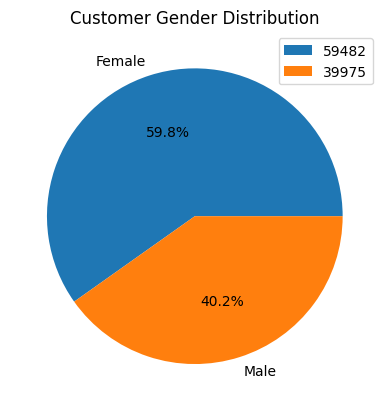

In [51]:
# Menhitung jumlah Gender
gender_count = df['gender'].value_counts()

# Buat pie chart
fig, ax = plt.subplots()
ax.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
ax.set_title('Customer Gender Distribution')
plt.legend(gender_count)

plt.show()

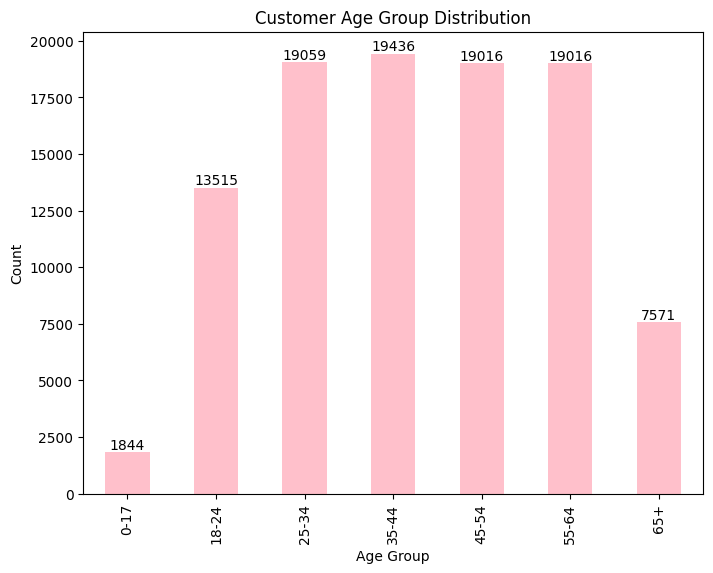

In [44]:
# Define age groups
age_groups = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age groups based on the age column
df['Age Group'] = pd.cut(df['age'], bins=age_groups, labels=labels)

# Create a histogram of age groups
fig, ax = plt.subplots(figsize=(8, 6))
df['Age Group'].value_counts().sort_index().plot(kind='bar', color='pink', ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Customer Age Group Distribution')

# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()

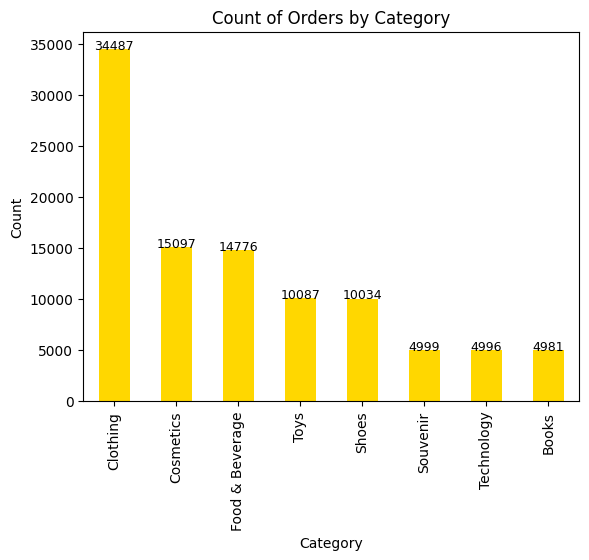

In [47]:
# create a bar chart to visualize the count of each category
category_count = df['category'].value_counts()
category_count.plot(kind='bar', color='gold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Orders by Category')

# add labels to the bars
for i, count in enumerate(category_count):
    plt.text(i, count+10, str(count), ha='center', fontsize=9)

plt.show()

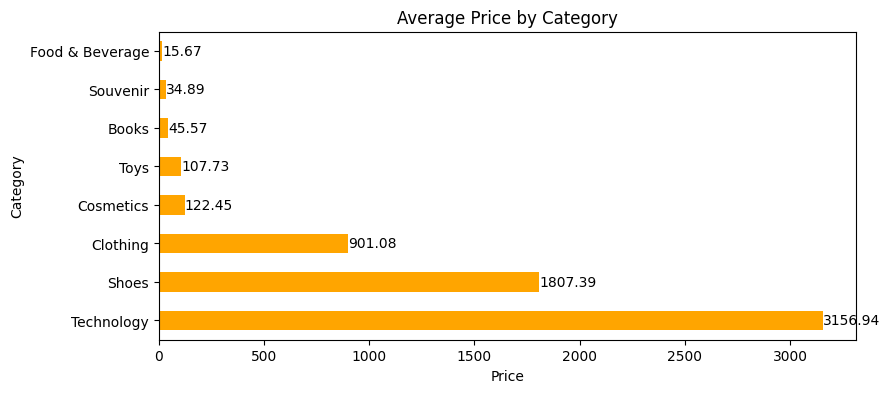

In [50]:
# create a horizontal bar chart to visualize the average quantity for each category
category_mean = df.groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(9,4))
category_mean.plot(kind='barh', color='orange')
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Average Price by Category')

# add labels to the bars
for i, mean in enumerate(category_mean):
    plt.text(mean+0.1, i, str(round(mean, 2)), va='center', fontsize=10)

plt.show()

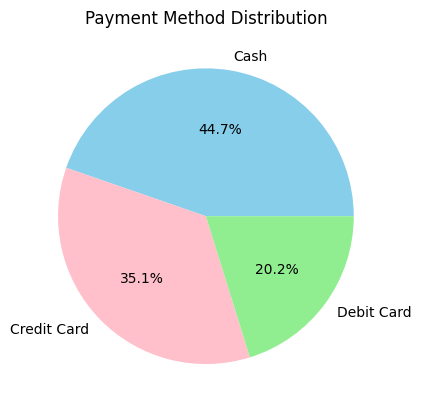

In [52]:
# Calculate the count of each gender
pay_count = df['payment_method'].value_counts()

# define the colors for each gender
colors = ['skyblue', 'pink', 'lightgreen']

# Create pie chart
fig, ax = plt.subplots()
ax.pie(pay_count, labels=pay_count.index, colors=colors, autopct='%1.1f%%')
ax.set_title('Payment Method Distribution')

plt.show()

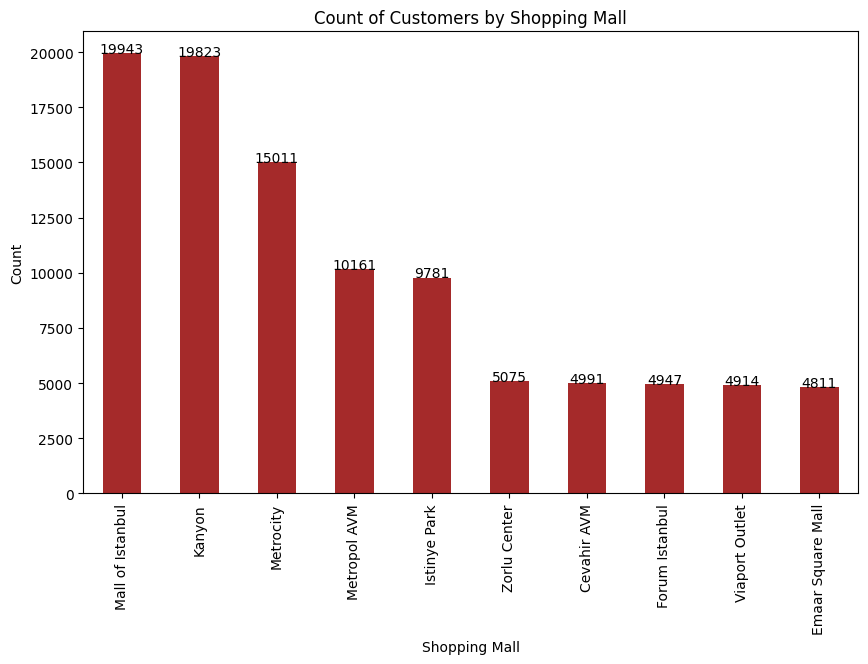

In [54]:
# get the count of each shopping mall
mall_count = df['shopping_mall'].value_counts()

# create a bar chart to visualize the count of each shopping mall
fig, ax = plt.subplots(figsize=(10, 6))
mall_count.plot(kind='bar', color='brown')
plt.xlabel('Shopping Mall')
plt.ylabel('Count')
plt.title('Count of Customers by Shopping Mall')

# add labels to the bars
for i, count in enumerate(mall_count):
    plt.text(i, count+10, str(count), ha='center')

plt.show()

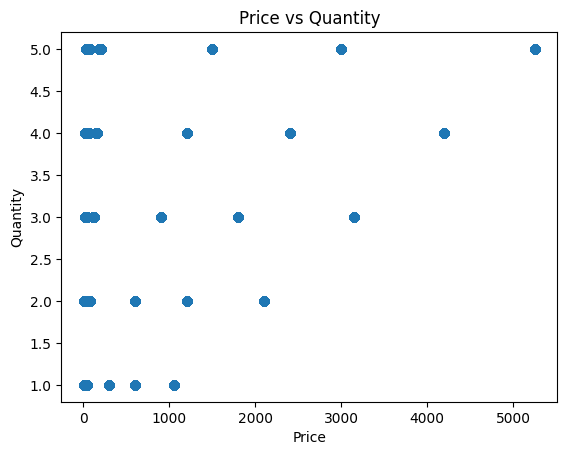

In [55]:
# create a scatter plot to visualize the relationship between price and quantity
plt.scatter(x='price', y='quantity', data=df)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity')
plt.show()